<a href="https://colab.research.google.com/github/yogeeshsm/Labprograms-ML-/blob/main/ML_Labprogram(BCM601).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

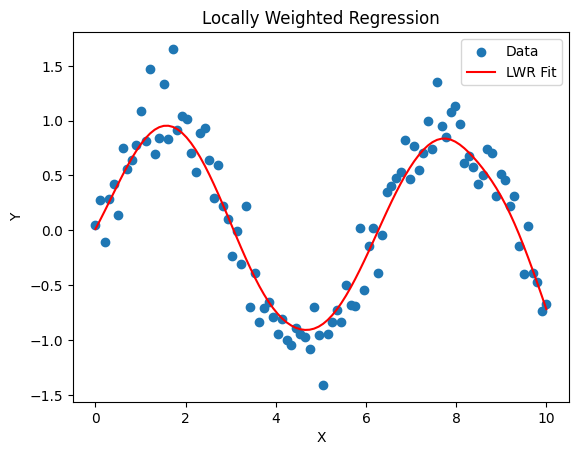

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def local_regression(X, y, tau=0.5):
    # Generate prediction range
    X_test = np.linspace(X.min(), X.max(), 100)
    predictions = []

    for x in X_test:
        # Calculate Gaussian weights
        weights = np.exp(-(X - x)**2 / (2 * tau**2))

        # Fit weighted linear regression
        model = LinearRegression()
        model.fit(X.reshape(-1,1), y, sample_weight=weights)

        predictions.append(model.predict([[x]]))

    # Plot results
    fig, ax = plt.subplots()
    ax.scatter(X, y, label='Data')
    ax.plot(X_test, predictions, 'r', label='LWR Fit')
    ax.set(title='Locally Weighted Regression', xlabel='X', ylabel='Y')
    ax.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate sample data
    X = np.linspace(0, 10, 100)
    y = np.sin(X) + np.random.normal(0, 0.2, 100)

    local_regression(X, y)


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def generate_data():
    x = np.random.rand(100).reshape(-1, 1)
    y = np.array(["class1" if xi <= 0.5 else "class2" for xi in x[:50]])
    print("Classes for x1 to x50:\n", y)
    y = np.append(y, [-1] * 50)
    return x, y

def classify_knn(x, y, k_values):
    x_train, y_train = x[:50], y[:50]
    x_test = x[50:]
    results = {}

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        results[k] = knn.predict(x_test)

    return results

# Main
x, y = generate_data()
k_values = [1, 2, 3, 4, 5, 20]
results = classify_knn(x, y, k_values)

for k, preds in results.items():
    print(f"\nk = {k}: Predicted classes for x51 to x100:\n{preds}")


Classes for x1 to x50:
 ['class1' 'class1' 'class2' 'class2' 'class2' 'class2' 'class2' 'class2'
 'class1' 'class1' 'class1' 'class1' 'class2' 'class2' 'class1' 'class1'
 'class2' 'class1' 'class1' 'class2' 'class2' 'class1' 'class2' 'class1'
 'class2' 'class1' 'class2' 'class1' 'class2' 'class2' 'class1' 'class1'
 'class2' 'class2' 'class1' 'class1' 'class1' 'class1' 'class1' 'class2'
 'class1' 'class1' 'class1' 'class2' 'class1' 'class2' 'class2' 'class1'
 'class2' 'class2']

k = 1: Predicted classes for x51 to x100:
['class1' 'class1' 'class2' 'class2' 'class2' 'class1' 'class1' 'class2'
 'class1' 'class2' 'class1' 'class1' 'class2' 'class2' 'class2' 'class2'
 'class2' 'class2' 'class1' 'class1' 'class2' 'class2' 'class2' 'class2'
 'class2' 'class1' 'class2' 'class1' 'class2' 'class2' 'class2' 'class1'
 'class1' 'class2' 'class1' 'class1' 'class1' 'class2' 'class1' 'class1'
 'class1' 'class2' 'class1' 'class1' 'class2' 'class1' 'class1' 'class2'
 'class2' 'class2']

k = 2: Predicted

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# --- Linear Regression (Boston Housing) ---
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data[:, 5].reshape(-1, 1)  # 'RM' column
y = boston.target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price')
plt.title('Linear Regression: Boston Housing')
plt.legend()
plt.show()

# --- Polynomial Regression (Auto MPG) ---
auto = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv").dropna()
auto = auto[pd.to_numeric(auto['horsepower'], errors='coerce').notnull()]
X = auto['horsepower'].astype(float).values.reshape(-1, 1)
y = auto['mpg'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Actual')
# Sort for smooth curve
sort_idx = X[:, 0].argsort()
plt.plot(X[sort_idx], y_poly_pred[sort_idx], color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: Auto MPG')
plt.legend()
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston

# --- Linear Regression on Boston Housing Dataset ---
boston = load_boston()
X_boston = boston.data[:, 5].reshape(-1, 1)  # Average number of rooms
y_boston = boston.target

lr_model = LinearRegression()
lr_model.fit(X_boston, y_boston)
y_boston_pred = lr_model.predict(X_boston)

plt.scatter(X_boston, y_boston, color='blue', label='Actual')
plt.plot(X_boston, y_boston_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price')
plt.title('Linear Regression: Boston Housing')
plt.legend()
plt.show()

# --- Polynomial Regression on Auto MPG Dataset ---
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
auto = pd.read_csv(url).dropna()
auto = auto[pd.to_numeric(auto['horsepower'], errors='coerce').notnull()]

X_auto = auto['horsepower'].astype(float).values.reshape(-1, 1)
y_auto = auto['mpg'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_auto)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_auto)
y_poly_pred = poly_model.predict(X_poly)

# Sort values for smooth curve
sorted_idx = X_auto[:, 0].argsort()
X_sorted = X_auto[sorted_idx]
y_sorted = y_poly_pred[sorted_idx]

plt.scatter(X_auto, y_auto, color='blue', label='Actual')
plt.plot(X_sorted, y_sorted, color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: Auto MPG')
plt.legend()
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Accuracy: 0.96


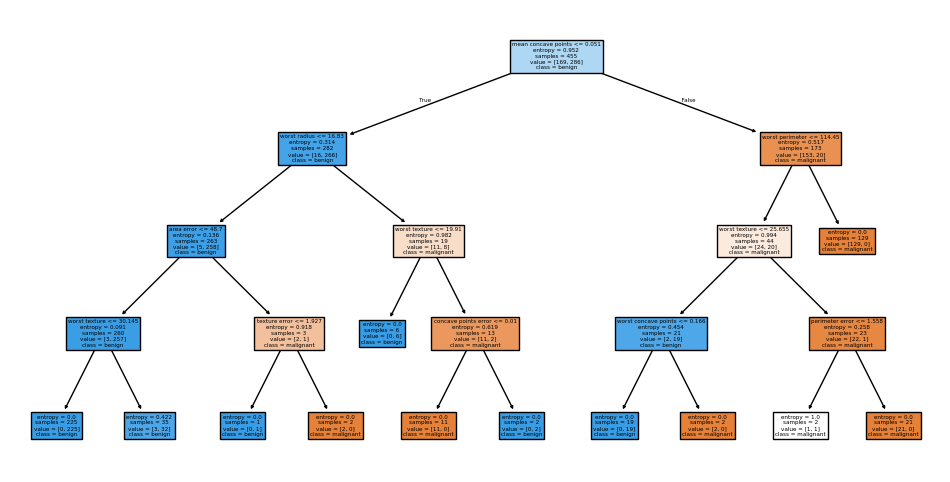

Predicted Class: malignant


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load data and split
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
print(f'Accuracy: {model.score(X_test, y_test):.2f}')
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

# Predict new sample
new_sample = np.array([[14.5, 20.1, 96.5, 666.1, 0.1, 0.15, 0.2, 0.1, 0.2, 0.05,
                        0.5, 1.2, 3.0, 50.0, 0.007, 0.04, 0.05, 0.02, 0.03, 0.005,
                        18.5, 25.1, 120.3, 900.5, 0.15, 0.25, 0.3, 0.15, 0.3, 0.08]])
print('Predicted Class:', data.target_names[model.predict(new_sample)[0]])


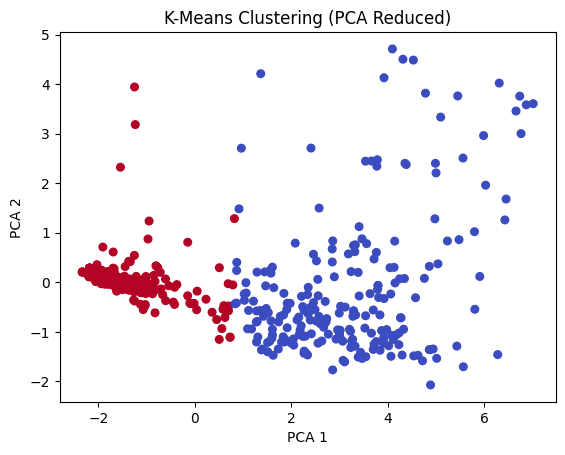

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and clean data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer-wisconsin.data"
cols = ['ID','Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion',
        'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df = pd.read_csv(url, header=None, names=cols).replace('?', np.nan).dropna()
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)
X = df.drop(columns=['ID', 'Class'])

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='coolwarm', s=30)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


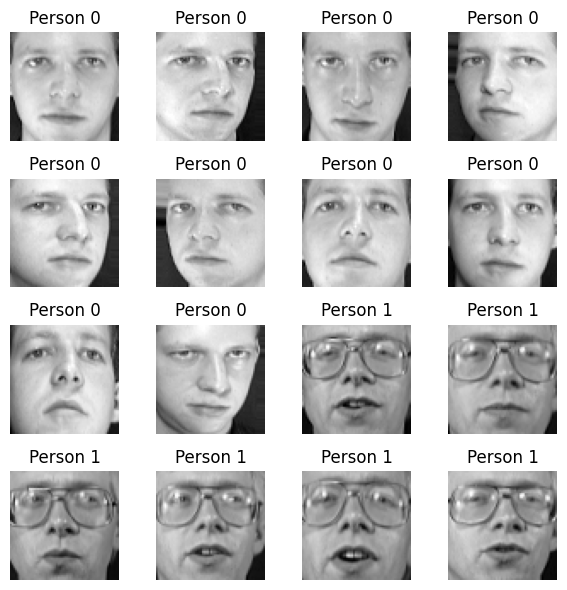

Accuracy: 73.33 %
Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = fetch_olivetti_faces()
X, y = data.data, data.target

# Show first 16 faces
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(data.images[i], cmap='gray')
    ax.set_title(f"Person {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

# Train and evaluate Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
